<a href="https://colab.research.google.com/github/CharviAggarwal02/InLighn-Tech/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stock Price Prediction**
**Industry:** Finance

**Description:** Predict stock prices using historical data and technical indicators for trading
insights.
**Instructions:**
1. Collect historical stock price data and calculate indicators (e.g., moving averages, RSI).
2. Preprocess data by normalizing and creating time-series sequences.
3. Train a model (e.g., LSTM, GRU) to predict future prices.
4. Evaluate with RMSE and backtest against historical data.
5. Visualize predictions vs. actual prices.

**Dataset:** Yahoo Finance API or Kaggle Stock Data  #using Kaggle Stock Data
**Tools:** Python, Pandas, TensorFlow/Keras, Matplotlib

In [ ]:
import yfinance as yf

# Download stock data (Apple in this example)
df = yf.download("AAPL", start="2015-01-01", end="2025-01-01")
print(df.head())


/tmp/ipython-input-1289411708.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2015-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.261047  24.729270  23.821672  24.718174  212818400
2015-01-05  23.577581  24.110158  23.391181  24.030271  257142000
2015-01-06  23.579788  23.839418  23.218079  23.641922  263188400
2015-01-07  23.910439  24.010296  23.677436  23.788389  160423600
2015-01-08  24.829128  24.886824  24.121246  24.238858  237458000


FEATURE ENGINEERING

In [ ]:
import pandas as pd

# Moving averages
df["MA20"] = df["Close"].rolling(window=20).mean()
df["MA50"] = df["Close"].rolling(window=50).mean()

# RSI
delta = df["Close"].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df["RSI"] = 100 - (100 / (1 + rs))

# Drop NA values
df = df.dropna()


In [ ]:
import numpy as np           #preprocessing data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[["Close", "MA20", "MA50", "RSI"]])

X, y = [], []
time_steps = 60
for i in range(time_steps, len(scaled_data)):
    X.append(scaled_data[i-time_steps:i])
    y.append(scaled_data[i, 0])  # Predict Close price

X, y = np.array(X), np.array(y)


In [ ]:
train_size = int(len(X) * 0.8)          #train-test data
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 0.0175 - val_loss: 0.0018
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 8.2710e-04 - val_loss: 7.9103e-04
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 7.5774e-04 - val_loss: 0.0024
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 7.0712e-04 - val_loss: 8.2947e-04
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 7.4944e-04 - val_loss: 0.0014
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 5.6453e-04 - val_loss: 0.0018
Epoch 10/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 7.2007e-04 - val_loss: 7.6379e-04
Epoch 11/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 6.1152e-04 - val_loss: 7.0896e-04
Epoch 12/20
55/55 ━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(
    np.concatenate((predictions, np.zeros((predictions.shape[0], scaled_data.shape[1]-1))), axis=1)
)[:,0]

actual = scaler.inverse_transform(
    np.concatenate((y_test.reshape(-1,1), np.zeros((y_test.shape[0], scaled_data.shape[1]-1))), axis=1)
)[:,0]

rmse = np.sqrt(mean_squared_error(actual, predictions))
print("RMSE:", rmse)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step
RMSE: 10.660231785718418


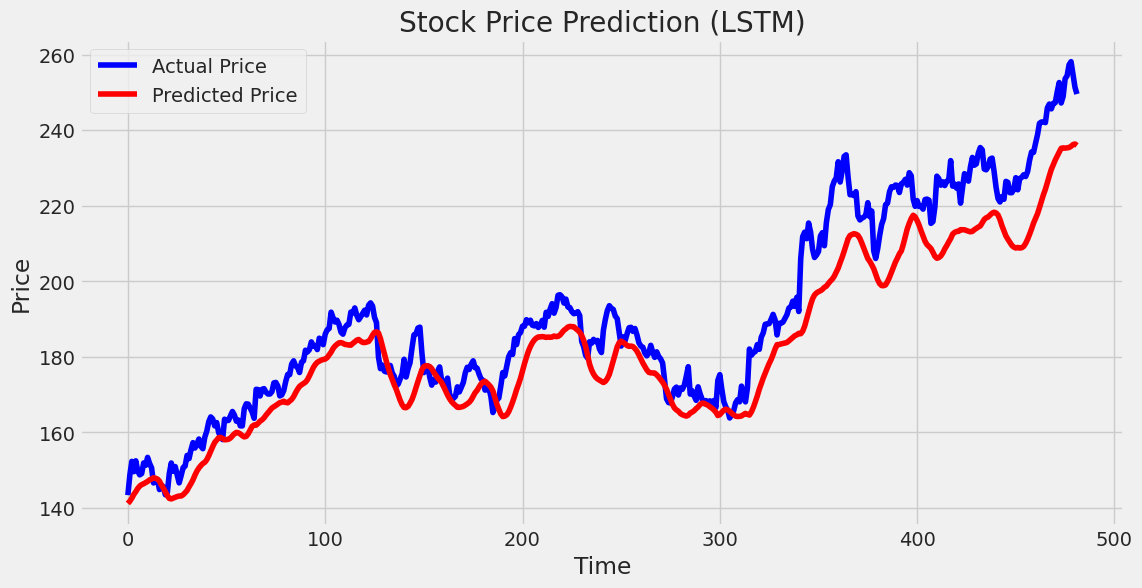

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(actual, color="blue", label="Actual Price")
plt.plot(predictions, color="red", label="Predicted Price")
plt.title("Stock Price Prediction (LSTM)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()
